/var/folders/sv/qy8vlp51007g2k72ybwrhhqw0000gp/T/ipykernel_13255/2706477957.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/sv/qy8vlp51007g2k72ybwrhhqw0000gp/T/ipykernel_13255/2706477957.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(assets,))


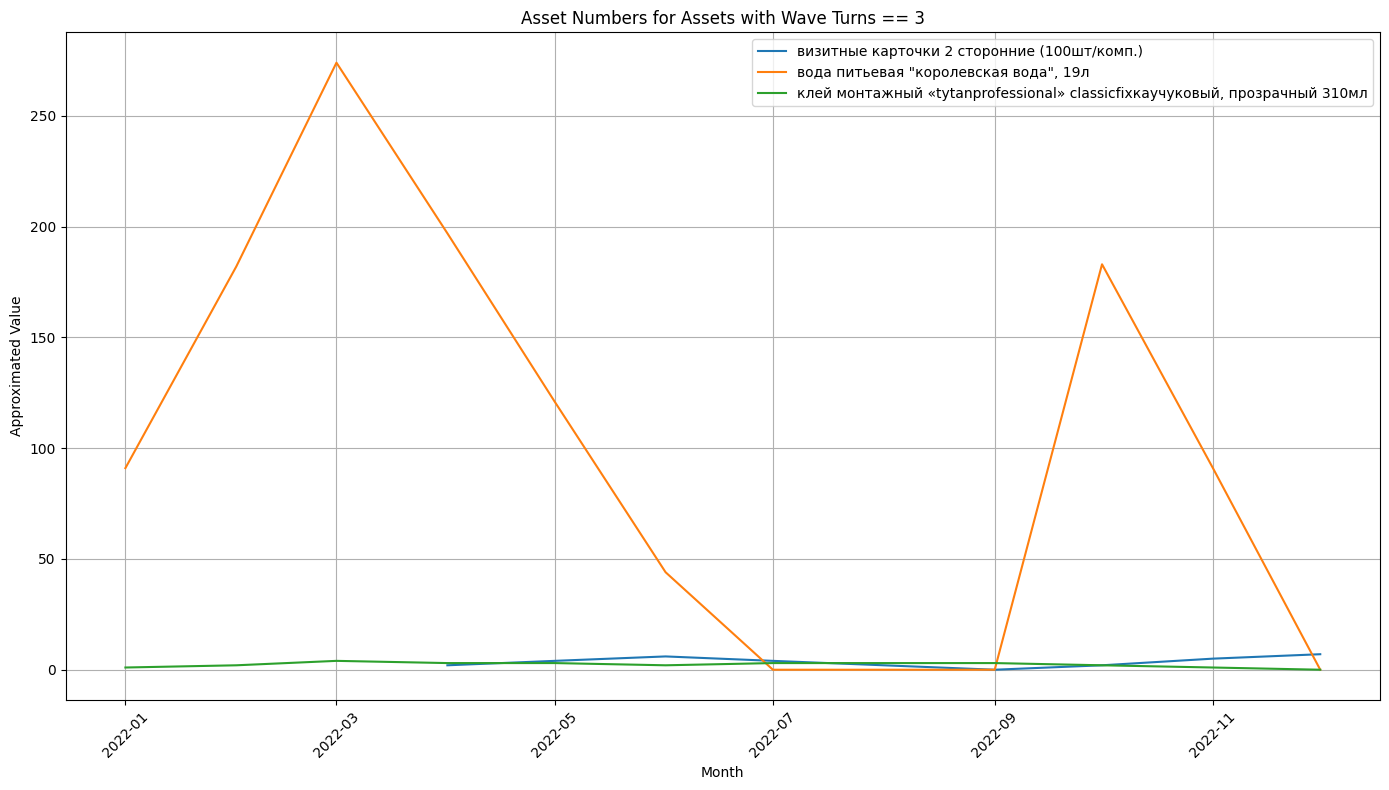

In [8]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Database connection details from environment variables
db_name = os.getenv('DB_NAME', 'moshack')
db_user = os.getenv('DB_USER', 'postgres')
db_password = os.getenv('DB_PASSWORD', 'postgres')
db_host = os.getenv('DB_HOST', 'localhost')
db_port = os.getenv('DB_PORT', '5432')

# Fetch assets with wave_turns > 2
def fetch_assets_with_wave_turns():
    conn = psycopg2.connect(
        dbname=db_name,
        user=db_user,
        password=db_password,
        host=db_host,
        port=db_port
    )
    query = "SELECT asset_name FROM monthly_asset_analytics WHERE wave_turns_number > 2"
    df = pd.read_sql(query, conn)
    conn.close()
    return df['asset_name'].tolist()

# Fetch monthly asset data for specified assets
def fetch_monthly_asset_data(assets):
    conn = psycopg2.connect(
        dbname=db_name,
        user=db_user,
        password=db_password,
        host=db_host,
        port=db_port
    )
    query = f"""
    SELECT month, approximated_value, asset_name 
    FROM monthly_asset_data 
    WHERE asset_name = ANY(%s)
    """
    df = pd.read_sql(query, conn, params=(assets,))
    conn.close()
    return df

# Plot the data
def plot_asset_numbers(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    for asset_name, group in df.groupby('asset_name'):
        ax.plot(group['month'], group['approximated_value'], label=asset_name)
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Approximated Value')
    ax.set_title('Asset Numbers for Assets with Wave Turns == 3')
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    ax.legend(loc='best')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    assets = fetch_assets_with_wave_turns()
    if assets:
        df = fetch_monthly_asset_data(assets)
        plot_asset_numbers(df)
    else:
        print("No assets with wave turns greater than 2 found.")

if __name__ == '__main__':
    main()
